In [1]:
#CNN is a type of artificial Neural Network which is widely used for object/image recognition and classification.
#Deep Learning recognizes objects in an image by using CNN.

In [2]:
# Import the necessary packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# a. Loading and preprocessing the image data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28,28,1)  # images are greyscale thats why input chaneel is 1

In [4]:
# making sure that the values are float so that we can get the decimal points after devision
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

# print('Data type of x_train:',x_train.dtype)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# print('Data type of x_train after converting to float:',x_train.dtype)


In [5]:
# Normalizing the RGB codes by deviding it to the max RGB value

x_train = x_train/255
x_test = x_test/255

print('shape of training :',x_train.shape)

shape of training : (60000, 28, 28, 1)


In [6]:
print('shape of testing :',x_test.shape)

shape of testing : (10000, 28, 28, 1)


In [7]:
# b. Defining the model’s architecture

model = Sequential()  # used sequential as we have to add layers one after another
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
# kernel size - it is kernel size or filter size, it is an size of each convolutional layer, you can change size also
# input shape is input size which we have declared above

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(200,activation='relu'))  # Hidden Layer
model.add(Dropout(0.3))                  # Will drop some random neurons from hidden layer, 30%neurons will be removed
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [8]:
# c. Training the model

model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 70s 36ms/step - loss: 0.2018 - accuracy: 0.9387
Epoch 2/2
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0833 - accuracy: 0.9746


In [9]:
# d. Estimating the model’s performance

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0654 - accuracy: 0.9786
loss=0.065
Accuracy=0.979


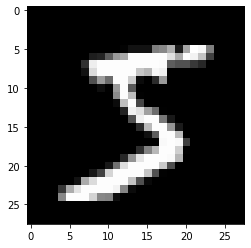

In [10]:
# Showing image at position[] from dataset

image = x_train[0]
plt.imshow(np.squeeze(image),cmap='gray')  # it will remove arrays of single diamensional
plt.show()

In [11]:
# predicting the class of image

image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print('predicted class: {}'.format(np.argmax(predict_model)))  # it displays max value

1/1 [==============================] - 0s 216ms/step
predicted class: 5
